### Decision Trees

**Exercise 3 (p.332, Chap.8)**

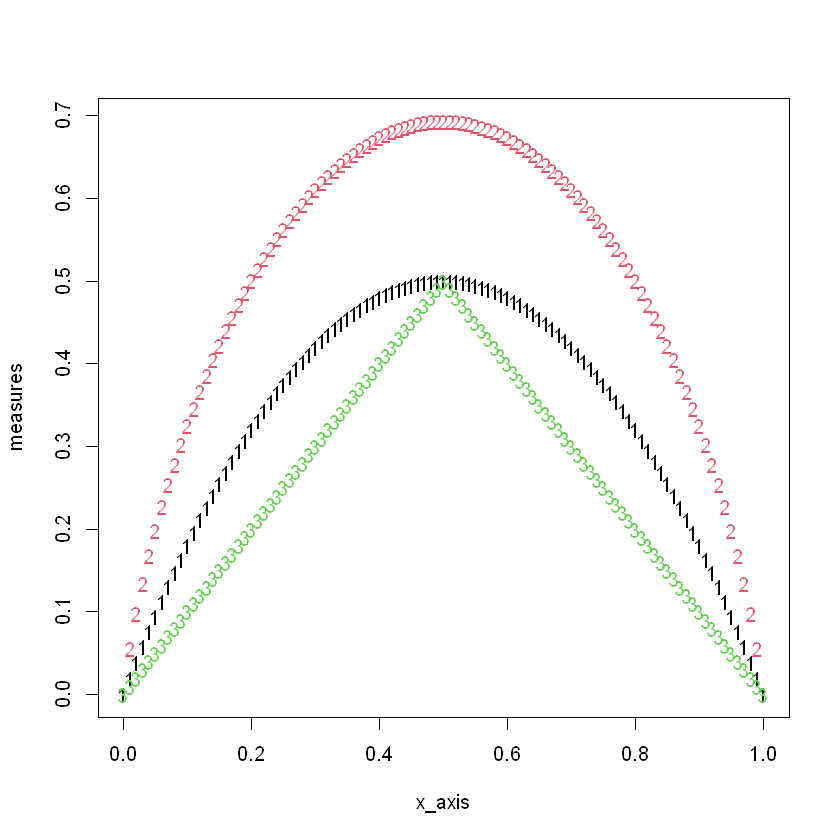

In [15]:
x_axis <- seq(0, 1, 0.01)
gini <- x_axis * (1 - x_axis) * 2
entropy <- -(x_axis * log(x_axis) + (1 - x_axis) * log(1 - x_axis))
error <- 1 - pmax(x_axis, 1 - x_axis)
measures <- cbind(gini, entropy, error)
matplot(x_axis, measures)

**Exercise 5 (p.332, Chap.8)**

In [9]:
estim <- c( 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75 )

# Majority vote approach
threshold <-  0.5
red <- sum(estim >= threshold)
green <- sum(estim < threshold)
red > green

# Average approach
mean(estim)

[1] TRUE

[1] 0.45

Setting a threshold of 0.5 the majority vote approach indicates that the red light is dominant.

By looking at the mean the green light would be dominant since it is below the threshold established

**Exercise 8 (p.333, Chap.8)**

In [16]:
library(ISLR)
attach(Carseats)

train <- sample(dim(Carseats)[1], dim(Carseats)[1]/2)
train_df <- Carseats[train, ]
test_df <- Carseats[-train, ]


Regression tree:
tree(formula = Sales ~ ., data = train_df)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "Advertising" "CompPrice"  
[6] "Age"        
Number of terminal nodes:  15 
Residual mean deviance:  2.342 = 433.3 / 185 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.1900 -0.9183  0.1210  0.0000  0.9097  3.2960 

[1] "MSE: 4.56433513577684"

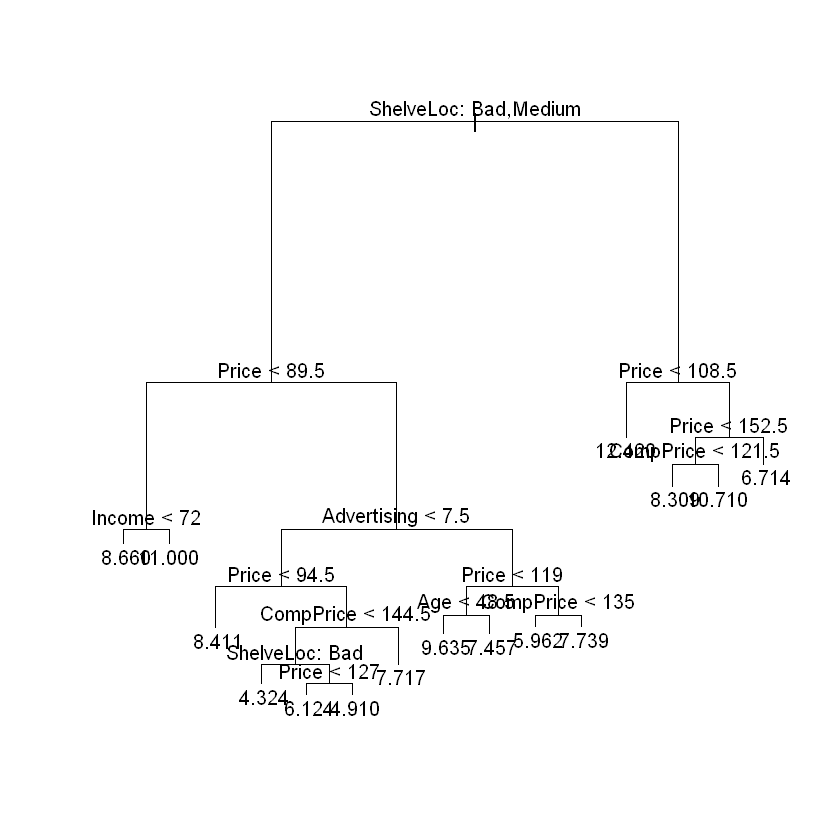

In [20]:
library(tree)
# Fitting model
tree.carseats = tree(Sales ~ ., data = train_df)
summary(tree.carseats)
# Plotting the tree corresponding 
plot(tree.carseats)
text(tree.carseats, pretty = 0)
# Creating prediction
pred = predict(tree.carseats, test_df)
# Calculating MSE
paste0("MSE: ", mean((test_df$Sales - pred)^2))

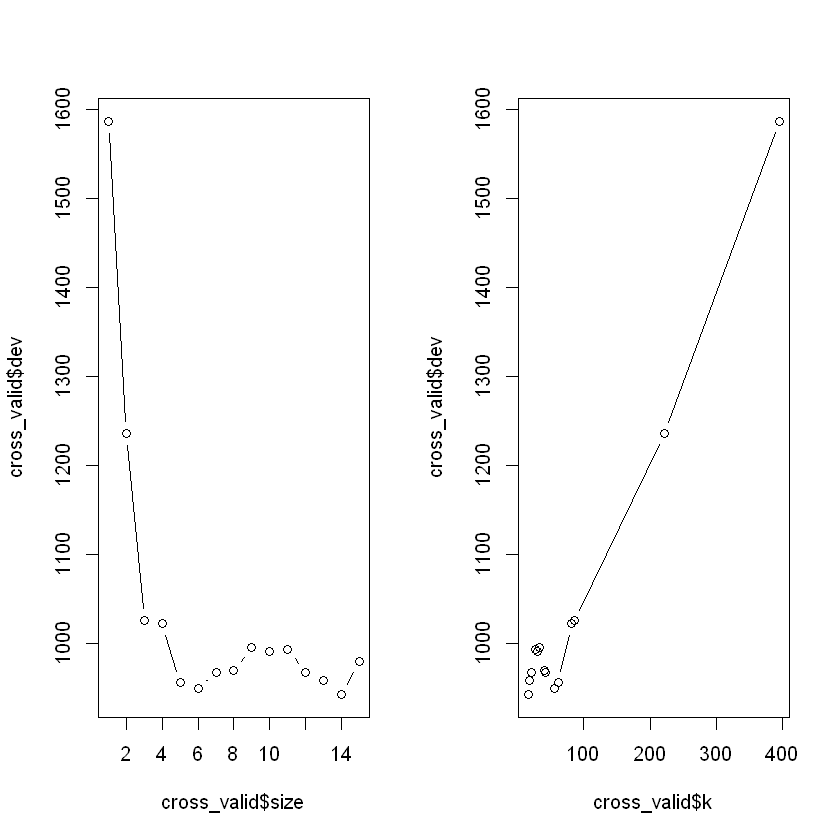

In [23]:
# Creating cross validation and detecting best pruning
cross_valid <- cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cross_valid$size, cross_valid$dev, type = "b")
plot(cross_valid$k, cross_valid$dev, type = "b")

[1] "MSE:4.8420319499001"

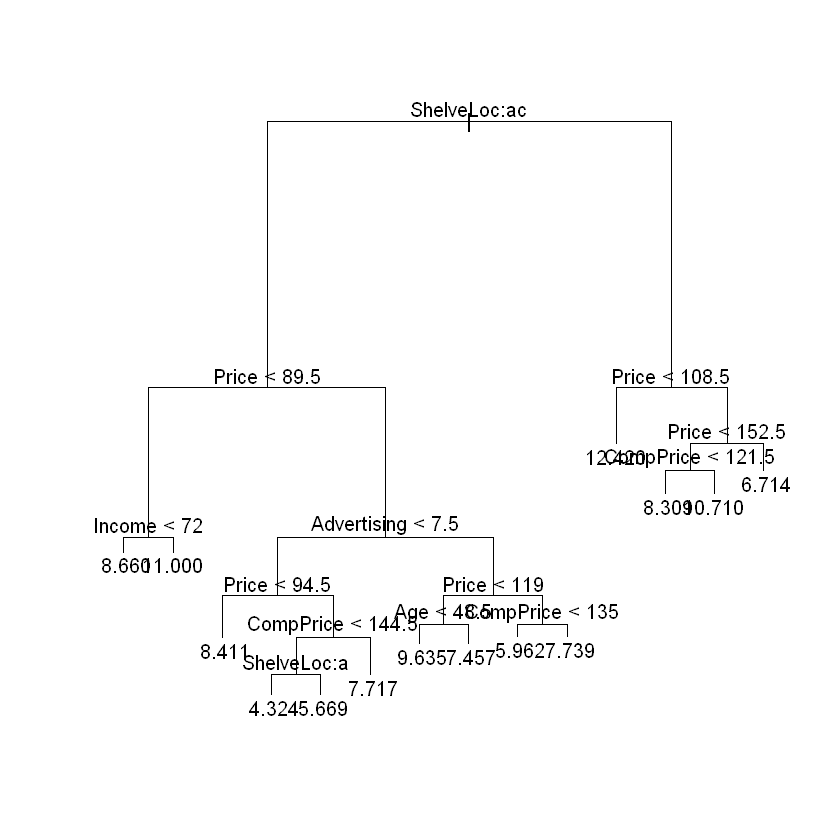

In [33]:
# Pruning tree
pruned.carseats <- prune.tree(tree.carseats, best = 14)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats)
pred_prun = predict(pruned.carseats, test_df)
paste0("MSE:", mean((test_df$Sales - pred_prun)^2))

In [35]:
# Random Forest model
library(randomForest)
# Bagging
bagging = randomForest(Sales ~ ., data = train_df, mtry = 10, ntree = 500, 
    importance = T)
bagging_pred = predict(bagging, test_df)

paste0("Bagging MSE: ",mean((test_df$Sales - bagging_pred)^2))

importance(bagging)
#Random forest
randomFor = randomForest(Sales ~ ., data = train_df, mtry = 5, ntree = 500, 
    importance = T)
rf_pred = predict(randomFor, test_df)
paste0("RF MSE: ", mean((test_df$Sales - rf_pred)^2))

[1] "Bagging MSE: 3.16600623302195"

,%IncMSE,IncNodePurity
CompPrice,21.1143822,156.052535
Income,7.0904989,82.771855
Advertising,20.8190219,123.539795
Population,-0.7452334,64.679955
Price,53.4076553,496.628728
ShelveLoc,46.4404635,420.262715
Age,11.8033312,102.928204
Education,3.2551686,51.969075
Urban,-3.5620927,6.949615
US,3.4244800,11.945343


[1] "RF MSE: 3.25898638126562"